In [430]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [431]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [432]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [433]:
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [434]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [435]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [436]:
train.drop("Name",inplace=True, axis=1)

train.drop("Ticket",inplace=True, axis=1)
train.drop("Cabin",inplace=True, axis=1)
train.drop("Fare",inplace=True, axis=1)


In [437]:
test.drop("Name",inplace=True, axis=1)
test.drop("Ticket",inplace=True, axis=1)
test.drop("Cabin",inplace=True, axis=1)
test.drop("Fare",inplace=True, axis=1)

In [438]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [439]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


In [440]:
train_mod=train.copy()

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

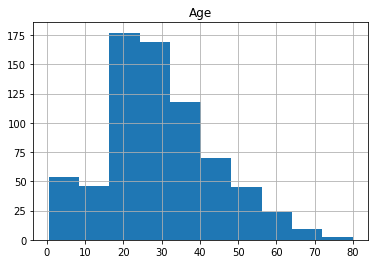

In [441]:
train.hist(column='Age')


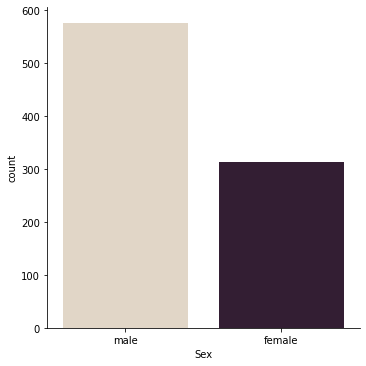

In [442]:
sns.catplot(x="Sex", kind="count", palette="ch:.25", data=train)


In [443]:
train['Sex'] =train['Sex'].map({'male':0, 'female':1})

In [444]:
test['Sex'] =test['Sex'].map({'male':0, 'female':1})

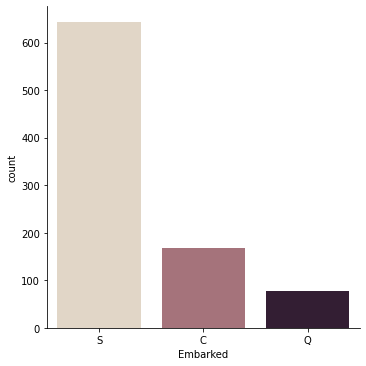

In [445]:
sns.catplot(x="Embarked", kind="count", palette="ch:.25", data=train_mod)


In [446]:
train['Embarked'] =train['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [447]:
test['Embarked'] =test['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [448]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,0.0
1,2,1,1,1,38.0,1,0,1.0
2,3,1,3,1,26.0,0,0,0.0
3,4,1,1,1,35.0,1,0,0.0
4,5,0,3,0,35.0,0,0,0.0


In [449]:
y= train['Survived'].to_numpy().astype('float32')

In [450]:
y

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.

In [451]:
train.drop("Survived",inplace=True, axis=1)

In [452]:
# train.drop("PassengerId",inplace=True, axis=1)

In [453]:
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,0,22.0,1,0,0.0
1,2,1,1,38.0,1,0,1.0
2,3,3,1,26.0,0,0,0.0
3,4,1,1,35.0,1,0,0.0
4,5,3,0,35.0,0,0,0.0


In [454]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,0,34.5,0,0,2
1,893,3,1,47.0,1,0,0
2,894,2,0,62.0,0,0,2
3,895,3,0,27.0,0,0,0
4,896,3,1,22.0,1,1,0


In [455]:
train['Age'] = train['Age'].fillna(train['Age'].mean())


In [456]:
test['Age'] = test['Age'].fillna(test['Age'].mean())


In [457]:
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,0,22.0,1,0,0.0
1,2,1,1,38.0,1,0,1.0
2,3,3,1,26.0,0,0,0.0
3,4,1,1,35.0,1,0,0.0
4,5,3,0,35.0,0,0,0.0


In [458]:
train.drop("PassengerId",inplace=True, axis=1)

In [459]:
train.fillna(value=0, inplace=True)


In [460]:
train_x=train.to_numpy()
train_x

array([[ 3.        ,  0.        , 22.        ,  1.        ,  0.        ,
         0.        ],
       [ 1.        ,  1.        , 38.        ,  1.        ,  0.        ,
         1.        ],
       [ 3.        ,  1.        , 26.        ,  0.        ,  0.        ,
         0.        ],
       ...,
       [ 3.        ,  1.        , 29.69911765,  1.        ,  2.        ,
         0.        ],
       [ 1.        ,  0.        , 26.        ,  0.        ,  0.        ,
         1.        ],
       [ 3.        ,  0.        , 32.        ,  0.        ,  0.        ,
         2.        ]])

In [461]:
testId= test['PassengerId'].to_numpy().astype('float32')
testId

array([ 892.,  893.,  894.,  895.,  896.,  897.,  898.,  899.,  900.,
        901.,  902.,  903.,  904.,  905.,  906.,  907.,  908.,  909.,
        910.,  911.,  912.,  913.,  914.,  915.,  916.,  917.,  918.,
        919.,  920.,  921.,  922.,  923.,  924.,  925.,  926.,  927.,
        928.,  929.,  930.,  931.,  932.,  933.,  934.,  935.,  936.,
        937.,  938.,  939.,  940.,  941.,  942.,  943.,  944.,  945.,
        946.,  947.,  948.,  949.,  950.,  951.,  952.,  953.,  954.,
        955.,  956.,  957.,  958.,  959.,  960.,  961.,  962.,  963.,
        964.,  965.,  966.,  967.,  968.,  969.,  970.,  971.,  972.,
        973.,  974.,  975.,  976.,  977.,  978.,  979.,  980.,  981.,
        982.,  983.,  984.,  985.,  986.,  987.,  988.,  989.,  990.,
        991.,  992.,  993.,  994.,  995.,  996.,  997.,  998.,  999.,
       1000., 1001., 1002., 1003., 1004., 1005., 1006., 1007., 1008.,
       1009., 1010., 1011., 1012., 1013., 1014., 1015., 1016., 1017.,
       1018., 1019.,

In [462]:
test.drop("PassengerId",inplace=True, axis=1)

In [463]:
test.fillna(value=0, inplace=True)


In [464]:
test_x=test.to_numpy()
test_x

array([[ 3.        ,  0.        , 34.5       ,  0.        ,  0.        ,
         2.        ],
       [ 3.        ,  1.        , 47.        ,  1.        ,  0.        ,
         0.        ],
       [ 2.        ,  0.        , 62.        ,  0.        ,  0.        ,
         2.        ],
       ...,
       [ 3.        ,  0.        , 38.5       ,  0.        ,  0.        ,
         0.        ],
       [ 3.        ,  0.        , 30.27259036,  0.        ,  0.        ,
         0.        ],
       [ 3.        ,  0.        , 30.27259036,  1.        ,  1.        ,
         1.        ]])

In [465]:
train_x = np.asarray(train_x).astype('float32')
train_y = np.asarray(y).astype('float32')

In [466]:
train_x

array([[ 3.      ,  0.      , 22.      ,  1.      ,  0.      ,  0.      ],
       [ 1.      ,  1.      , 38.      ,  1.      ,  0.      ,  1.      ],
       [ 3.      ,  1.      , 26.      ,  0.      ,  0.      ,  0.      ],
       ...,
       [ 3.      ,  1.      , 29.699118,  1.      ,  2.      ,  0.      ],
       [ 1.      ,  0.      , 26.      ,  0.      ,  0.      ,  1.      ],
       [ 3.      ,  0.      , 32.      ,  0.      ,  0.      ,  2.      ]],
      dtype=float32)

In [467]:
y

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.

In [468]:
from keras import Sequential, optimizers
from keras.layers import Embedding, LSTM, Dense, Dropout,Bidirectional,ConvLSTM2D,GRU,SimpleRNN,RNN
from keras import regularizers
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D,Conv1D

model = Sequential()

model.add(Dense(32,input_dim=6,activation='relu'))

model.add (Dropout(0.4))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))


model.add(Dense(1, activation='sigmoid'))


opt = optimizers.Adam(learning_rate=0.001)
#lr=0.0005
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])


In [469]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 32)                224       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_54 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 17        
Total params: 1,825
Trainable params: 1,825
Non-trainable params: 0
_________________________________________________________________


In [470]:
history=model.fit(train_x,train_y,batch_size=32, epochs=350)

Epoch 1/350
28/28 [==============================] - 1s 1ms/step - loss: 1.8313 - acc: 0.5693
Epoch 2/350
28/28 [==============================] - 0s 1ms/step - loss: 0.8952 - acc: 0.5654
Epoch 3/350
28/28 [==============================] - 0s 1ms/step - loss: 0.7608 - acc: 0.5672
Epoch 4/350
28/28 [==============================] - 0s 1ms/step - loss: 0.7536 - acc: 0.5744
Epoch 5/350
28/28 [==============================] - 0s 1ms/step - loss: 0.7528 - acc: 0.5145
Epoch 6/350
28/28 [==============================] - 0s 1ms/step - loss: 0.7220 - acc: 0.5778
Epoch 7/350
28/28 [==============================] - 0s 1ms/step - loss: 0.6838 - acc: 0.5966
Epoch 8/350
28/28 [==============================] - 0s 1ms/step - loss: 0.7115 - acc: 0.5670
Epoch 9/350
28/28 [==============================] - 0s 1ms/step - loss: 0.6764 - acc: 0.5622
Epoch 10/350
28/28 [==============================] - 0s 1ms/step - loss: 0.6745 - acc: 0.6186
Epoch 11/350
28/28 [==============================] - 0s 1m

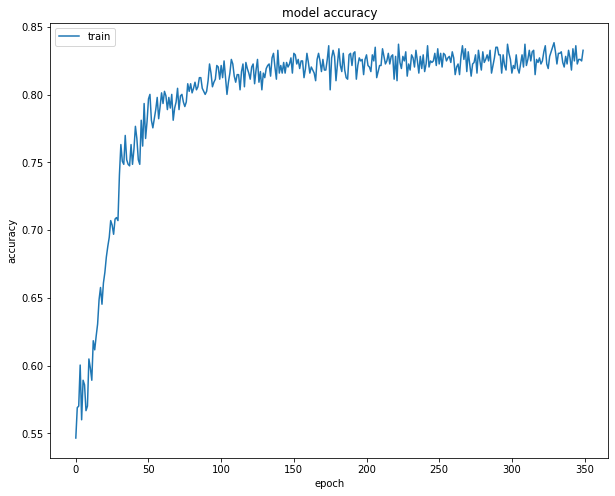

In [471]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(history.history['acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.savefig('model_Accuracy.png',dpi=600)

plt.show()

In [472]:
prediction=model.predict_classes(test_x)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [473]:
prediction=pd.DataFrame(prediction)

In [474]:
prediction.columns=["Survived"]

In [475]:
prediction

,Survived
0,0
1,1
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [477]:
testId=pd.DataFrame(testId)
testId

In [479]:
testId.columns=["PassengerId"]

In [485]:
testId=testId.astype('int64')

In [486]:
res=pd.concat([testId, prediction], axis=1)
res

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [489]:
sub = res.to_csv('gender_submissions.csv')